In [1]:
import mlrose_hiive as mlrose
import numpy as np
import time

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from itertools import cycle


In [2]:
state = state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])
#state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
FourPeaks_fitness = mlrose.FourPeaks(t_pct=0.15)

In [3]:
#problem = mlrose.KnapsackOpt(length = 25, fitness_fn = knap_sack_fitness, maximize = True, max_val = 2)

problem = mlrose.DiscreteOpt(length = 16, fitness_fn = FourPeaks_fitness, maximize = True, max_val = 2)

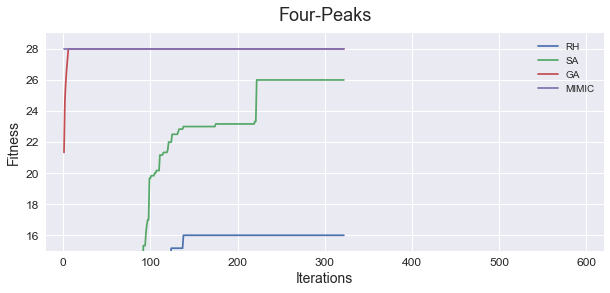

In [4]:
init_state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])
random_state = [1,10,100,1000,10000,100000]
best_curve_list = []
best_fitness_list = []
best_state_list = []
for r in random_state:
    # Solve problem using random hill climb
    best_state, best_fitness, best_curve = mlrose.random_hill_climb(problem,
                                                      max_attempts = 100, max_iters = 1000,
                                                      init_state = init_state, random_state =r,
                                                      curve = True,
                                                      restarts = 50,
                                                        #, state_fitness_callback = sfc
                                                        callback_user_info=[time.time()]
                                                        )
    best_curve_list.append(best_curve)
    best_fitness_list.append(best_fitness)
    best_state_list.append(best_state)

#allign shapes of beach best curve
best_curve_shape_list = [best_curve_list[i].shape for i in range(len(best_curve_list))]

max_best_curve_shape_list = max(best_curve_shape_list)[0]

best_curve_list_copy = best_curve_list
for elem in range(len(best_curve_list)):
    best_curve = best_curve_list[elem]
    last_elem = best_curve[-1]
    best_curve_list_copy[elem] = \
            np.append(best_curve_list_copy[elem]
              ,[last_elem for i in range(max_best_curve_shape_list - len(best_curve))])

best_curve_list = best_curve_list_copy


best_curve_mean = np.mean(best_curve_list,axis=0)
rh_best_curve_length = len(best_curve_mean)
rh_best_curve_range = [item for item in range(1, rh_best_curve_length + 1)]
rh_best_curve = best_curve_mean
rh_last_best_val = best_curve_mean[-1]




random_state = [1,10,100,1000,10000,100000]
best_curve_list = []
best_fitness_list = []
best_state_list = []

# Define decay schedule
schedule = mlrose.ExpDecay(init_temp=100.0, exp_const=0.1, min_temp=0.001)



for r in random_state:
    # Solve problem using simulated annealing
    best_state, best_fitness, best_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = 100, max_iters = 1000,
                                                      init_state = init_state, random_state = r,
                                                      curve = True)
    best_curve_list.append(best_curve)
    best_fitness_list.append(best_fitness)
    best_state_list.append(best_state)




#allign shapes of beach best curve
best_curve_shape_list = [best_curve_list[i].shape for i in range(len(best_curve_list))]

max_best_curve_shape_list = max(best_curve_shape_list)[0]

best_curve_list_copy = best_curve_list
for elem in range(len(best_curve_list)):
    best_curve = best_curve_list[elem]
    last_elem = best_curve[-1]
    best_curve_list_copy[elem] = \
            np.append(best_curve_list_copy[elem]
              ,[last_elem for i in range(max_best_curve_shape_list - len(best_curve))])

best_curve_list = best_curve_list_copy


best_curve_mean = np.mean(best_curve_list,axis=0)
sa_best_curve_length = len(best_curve_mean)
sa_best_curve_range = [item for item in range(1, sa_best_curve_length + 1)]
sa_best_curve = best_curve_mean
sa_last_best_val = best_curve_mean[-1]


random_state = [1,10,100,1000,10000,100000]
best_curve_list = []
best_fitness_list = []
best_state_list = []

    
# Define initial state
#init_state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
for r in random_state:
    # Solve problem using GA
    best_state, best_fitness, best_curve = mlrose.genetic_alg(problem,
                                                      pop_size = 200,
                                                      mutation_prob = 0.1,
                                                      max_attempts = 100, max_iters = 1000,
                                                      #init_state = init_state,
                                                      random_state = r,
                                                      curve = True
                                                        #, state_fitness_callback = sfc
                                                        #, callback_user_info=[time.time()]
                                                        )
    best_curve_list.append(best_curve)
    best_fitness_list.append(best_fitness)
    best_state_list.append(best_state)



#allign shapes of beach best curve
best_curve_shape_list = [best_curve_list[i].shape for i in range(len(best_curve_list))]

max_best_curve_shape_list = max(best_curve_shape_list)[0]

best_curve_list_copy = best_curve_list
for elem in range(len(best_curve_list)):
    best_curve = best_curve_list[elem]
    last_elem = best_curve[-1]
    best_curve_list_copy[elem] = \
            np.append(best_curve_list_copy[elem]
              ,[last_elem for i in range(max_best_curve_shape_list - len(best_curve))])

best_curve_list = best_curve_list_copy



best_curve_mean = np.mean(best_curve_list,axis=0)
ga_best_curve_length = len(best_curve_mean)
ga_best_curve_range = [item for item in range(1, ga_best_curve_length + 1)]
ga_best_curve = best_curve_mean
ga_last_best_val = best_curve_mean[-1]


random_state = [1,10,100,1000,10000,100000]
best_curve_list = []
best_fitness_list = []
best_state_list = []
  
# Define initial state
#init_state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])


for r in random_state:
    # Solve problem using MIMIC
    best_state, best_fitness, best_curve = mlrose.mimic(problem,
                                                      pop_size = 10000, #best hp
                                                      keep_pct = 0.2,
                                                      max_attempts = 50, max_iters = 50,
                                                      #init_state = init_state,
                                                      random_state = r,
                                                      curve = True
                                                        #, state_fitness_callback = sfc
                                                        #, callback_user_info=[time.time()]
                                                      )
    best_curve_list.append(best_curve)
    best_fitness_list.append(best_fitness)
    best_state_list.append(best_state)



#allign shapes of beach best curve
best_curve_shape_list = [best_curve_list[i].shape for i in range(len(best_curve_list))]

max_best_curve_shape_list = max(best_curve_shape_list)[0]

best_curve_list_copy = best_curve_list
for elem in range(len(best_curve_list)):
    best_curve = best_curve_list[elem]
    last_elem = best_curve[-1]
    best_curve_list_copy[elem] = \
            np.append(best_curve_list_copy[elem]
              ,[last_elem for i in range(max_best_curve_shape_list - len(best_curve))])

best_curve_list = best_curve_list_copy


best_curve_mean = np.mean(best_curve_list,axis=0)
mimic_best_curve_length = len(best_curve_mean)
mimic_best_curve_range = [item for item in range(1, mimic_best_curve_length + 1)]
mimic_best_curve = best_curve_mean
mimic_last_best_val = best_curve_mean[-1]




#find max iters
max_iters = max(rh_best_curve_length,sa_best_curve_length,ga_best_curve_length,mimic_best_curve_length)
max_range = [item for item in range(1, max_iters + 1)]


#adjust curve values to max iter
rh_best_curve = np.append(rh_best_curve,[rh_last_best_val for i in range(max_iters - rh_best_curve_length)])
sa_best_curve = np.append(sa_best_curve,[sa_last_best_val for i in range(max_iters - sa_best_curve_length)])
ga_best_curve = np.append(ga_best_curve,[ga_last_best_val for i in range(max_iters - ga_best_curve_length)])
mimic_best_curve = np.append(mimic_best_curve,[mimic_last_best_val for i in range(max_iters - mimic_best_curve_length)])


plt.style.use('seaborn')
fig = plt.gcf()
fig.set_size_inches(10, 4, forward=True)
plt.plot(max_range, rh_best_curve, label = 'RH')
plt.plot(max_range, sa_best_curve, label = 'SA')
plt.plot(max_range, ga_best_curve, label = 'GA')
plt.plot(max_range, mimic_best_curve, label = 'MIMIC')

plt.ylabel('Fitness', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('Four-Peaks', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(15,29)
plt.xlim(-20,620)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [5]:
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])
#state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
FourPeaks_fitness = mlrose.FourPeaks(t_pct=0.15)

problem = mlrose.DiscreteOpt(length = 16, fitness_fn = FourPeaks_fitness, maximize = True, max_val = 2)

init_state = state
max_iters = [100,200,300,400,500,600]
# Solve problem using random hill climb
rh_time_list = []
for iter in max_iters:
    start = time.time()
    best_state, best_fitness, best_curve = mlrose.random_hill_climb(problem,
                                                      max_attempts = 100, max_iters = iter,
                                                      init_state = init_state, random_state = 1,
                                                      curve = True,
                                                        #, state_fitness_callback = sfc
                                                        callback_user_info=[time.time()]
                                                        )
    end = time.time()
    rh_time_list.append(end-start)

sa_time_list = []
for iter in max_iters:
    start = time.time()
    best_state, best_fitness, best_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = 100, max_iters = iter,
                                                      init_state = init_state, random_state = 1,
                                                      curve = True)
    end = time.time()
    sa_time_list.append(end-start)

    
ga_time_list = []
for iter in max_iters:
    start = time.time()
    best_state, best_fitness, best_curve = mlrose.genetic_alg(problem,
                                                      pop_size = 200,
                                                      mutation_prob = 0.1,
                                                      max_attempts = 100, max_iters = iter,
                                                      #init_state = init_state,
                                                      random_state = 1,
                                                      curve = True
                                                        #, state_fitness_callback = sfc
                                                        #, callback_user_info=[time.time()]
                                                        )
    end = time.time()
    ga_time_list.append(end-start)

mimic_time_list = []
for iter in max_iters:
    start = time.time()
    best_state, best_fitness, best_curve = mlrose.mimic(problem,
                                                      pop_size = 200,
                                                      keep_pct = 0.2,
                                                      max_attempts = 1, max_iters = iter,
                                                      #init_state = init_state,
                                                      random_state = 1,
                                                      curve = True
                                                        #, state_fitness_callback = sfc
                                                        #, callback_user_info=[time.time()]
                                                      )
    end = time.time()
    mimic_time_list.append(end-start)

In [6]:
#mul by 100 and get log.
rh_time_list_log = [np.log(element * 100) for element in rh_time_list]
sa_time_list_log = [np.log(element * 100) for element in sa_time_list]
ga_time_list_log = [np.log(element * 100) for element in ga_time_list]
mimic_time_list_log = [np.log(element * 100) for element in mimic_time_list]

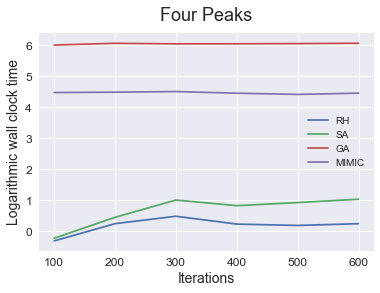

In [7]:
time_range = [100,200,300,400,500,600]
plt.style.use('seaborn')
fig = plt.gcf()
fig.set_size_inches(6, 4, forward=True)
plt.plot(time_range, rh_time_list_log, label = 'RH')
plt.plot(time_range, sa_time_list_log, label = 'SA')
plt.plot(time_range, ga_time_list_log, label = 'GA')
plt.plot(time_range, mimic_time_list_log, label = 'MIMIC')

plt.ylabel('Logarithmic wall clock time', fontsize = 14)
plt.xlabel('Iterations', fontsize = 14)
plt.title('Four Peaks', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(5,30)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [8]:
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])
#state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
FourPeaks_fitness = mlrose.FourPeaks(t_pct=0.15)

#problem = mlrose.KnapsackOpt(length = 25, fitness_fn = knap_sack_fitness, maximize = True, max_val = 2)

problem = mlrose.DiscreteOpt(length = 16, fitness_fn = FourPeaks_fitness, maximize = True, max_val = 2)

init_state = state


population_size = [200,1000,2000,10000,20000]

mimic_last_best_val_list = []
mimic_best_curve_list = []

for pop in population_size:

  random_state = [1,10,100,1000,10000,100000]
  best_curve_list = []
  best_fitness_list = []
  best_state_list = []


  for r in random_state:
      # Solve problem using simulated annealing
      best_state, best_fitness, best_curve = mlrose.mimic(problem,
                                                      pop_size = pop,
                                                      keep_pct = 0.2,
                                                      max_attempts = 1, max_iters = 1,
                                                      #init_state = init_state,
                                                      random_state = r,
                                                      curve = True
                                                        #, state_fitness_callback = sfc
                                                        #, callback_user_info=[time.time()]
                                                      )
      best_curve_list.append(best_curve)
      best_fitness_list.append(best_fitness)
      best_state_list.append(best_state)




  #allign shapes of beach best curve
  best_curve_shape_list = [best_curve_list[i].shape for i in range(len(best_curve_list))]

  max_best_curve_shape_list = max(best_curve_shape_list)[0]

  best_curve_list_copy = best_curve_list
  for elem in range(len(best_curve_list)):
      best_curve = best_curve_list[elem]
      last_elem = best_curve[-1]
      best_curve_list_copy[elem] = \
              np.append(best_curve_list_copy[elem]
                ,[last_elem for i in range(max_best_curve_shape_list - len(best_curve))])

  best_curve_list = best_curve_list_copy


  best_curve_mean = np.mean(best_curve_list,axis=0)
  mimic_best_curve_length = len(best_curve_mean)
  mimic_best_curve_range = [item for item in range(1, mimic_best_curve_length + 1)]
  mimic_best_curve = best_curve_mean
  mimic_last_best_val = best_curve_mean[-1]

  mimic_last_best_val_list.append(mimic_last_best_val)
  mimic_best_curve_list.append(best_curve_mean)

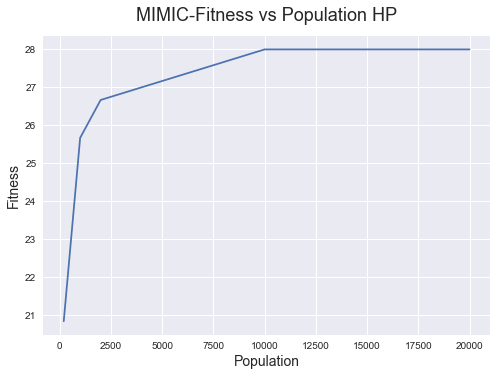

In [9]:
population_size = [200,1000,2000,10000,20000]
plt.style.use('seaborn')
plt.plot(population_size, mimic_last_best_val_list)
#plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Fitness', fontsize = 14)
plt.xlabel('Population', fontsize = 14)
plt.title('MIMIC-Fitness vs Population HP', fontsize = 18, y = 1.03)
#plt.legend()
#plt.ylim(0.70,0.75)
plt.show()


In [10]:
from itertools import cycle
def fitness_improvements(fitness):
    size = len(fitness)
    licycle = cycle(fitness)
    nextelem = next(licycle)
    counter = 1
    eval = 0
    while counter < size:
        thiselem, nextelem = nextelem, next(licycle)
        if thiselem < nextelem:
            eval = eval + 1
        counter = counter + 1
    return eval

#states = [4,8,12,16,24,50]
states = [8,12,16,24,50,100]

rhc_best_fitness_eval_list = []
sa_best_fitness_eval_list = []
ga_best_fitness_eval_list = []
mimic_best_fitness_eval_list = []

FourPeaks_fitness = mlrose.FourPeaks(t_pct=0.15)



for s in states:
    total_eval = 0
    problem = mlrose.DiscreteOpt(length = s, fitness_fn = FourPeaks_fitness, maximize = True, max_val = 2)

    best_state, best_fitness, best_curve = mlrose.random_hill_climb(problem,
                                                      max_attempts = 5000, max_iters = 10000,
                                                      init_state = None, random_state = 1,
                                                      curve = True,
                                                      restarts = 50,
                                                        #, state_fitness_callback = sfc
                                                        callback_user_info=[time.time()]
                                                        )

    total_eval = 1 + len(best_curve) + fitness_improvements(best_curve)
    rhc_best_fitness_eval_list.append(total_eval)

    total_eval = 0
    # Define decay schedule
    schedule = mlrose.ExpDecay(init_temp=100.0, exp_const=0.1, min_temp=0.001)




    best_state, best_fitness, best_curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = 5000, max_iters = 10000,
                                                      init_state = None, random_state = 1,
                                                      curve = True)
    total_eval = 1 + len(best_curve) + fitness_improvements(best_curve)
    sa_best_fitness_eval_list.append(total_eval)

    total_eval = 0
    
    ga_pop_size = 200
    best_state, best_fitness, best_curve = mlrose.genetic_alg(problem,
                                                      pop_size = ga_pop_size,
                                                      mutation_prob = 0.1,
                                                      max_attempts = 100, max_iters = 1000,
                                                      #init_state = init_state,
                                                      random_state = 1,
                                                      curve = True
                                                        #, state_fitness_callback = sfc
                                                        #, callback_user_info=[time.time()]
                                                        )    

    total_eval = ga_pop_size + (len(best_curve) * (ga_pop_size + 1)) + fitness_improvements(best_curve)
    ga_best_fitness_eval_list.append(total_eval)

    total_eval = 0
    
    mimic_pop_size = 200
    best_state, best_fitness, best_curve = mlrose.mimic(problem,
                                                      pop_size = mimic_pop_size, #best hp
                                                      keep_pct = 0.2,
                                                      max_attempts = 25, max_iters = 25,
                                                      #init_state = init_state,
                                                      random_state = 1,
                                                      curve = True
                                                        #, state_fitness_callback = sfc
                                                        #, callback_user_info=[time.time()]
                                                      )  

    total_eval = mimic_pop_size + (len(best_curve) * (mimic_pop_size + 1)) + fitness_improvements(best_curve)
    mimic_best_fitness_eval_list.append(total_eval)




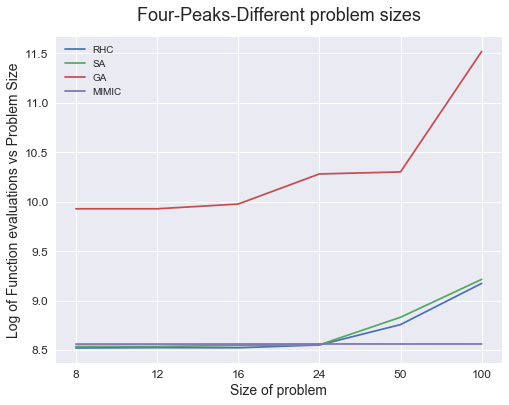

In [11]:
plt.style.use('seaborn')
fig = plt.gcf()
states = ['8','12','16','24','50','100']
fig.set_size_inches(8, 6, forward=True)
plt.plot(states, np.log(rhc_best_fitness_eval_list), label = 'RHC')
plt.plot(states, np.log(sa_best_fitness_eval_list), label = 'SA')
plt.plot(states, np.log(ga_best_fitness_eval_list), label = 'GA')
plt.plot(states, np.log(mimic_best_fitness_eval_list), label = 'MIMIC')
plt.ylabel('Log of Function evaluations vs Problem Size', fontsize = 14)
plt.xlabel('Size of problem', fontsize = 14)
plt.title('Four-Peaks-Different problem sizes', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(24,30)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()